# PERFORM EDA

Image Counts:
{'train': {'Cyst': 2967, 'Tumor': 1826, 'Stone': 1101, 'Normal': 4061}, 'val': {'Cyst': 370, 'Tumor': 228, 'Stone': 137, 'Normal': 507}, 'test': {'Cyst': 372, 'Tumor': 229, 'Stone': 139, 'Normal': 509}}


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


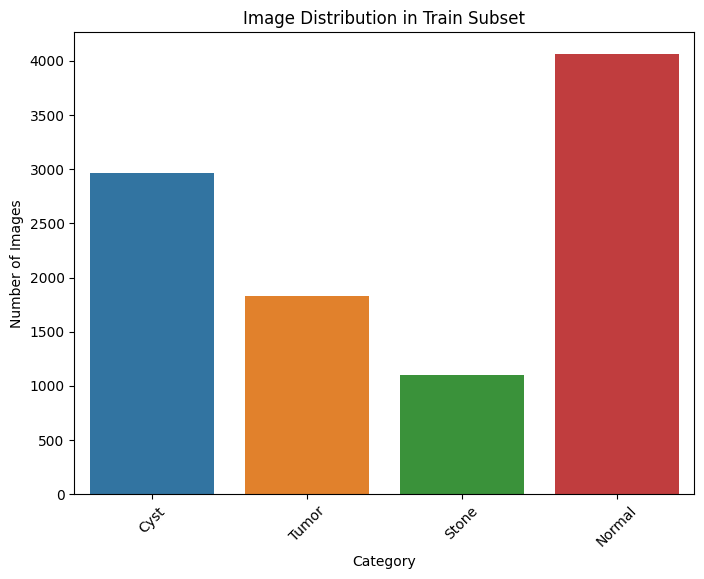

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


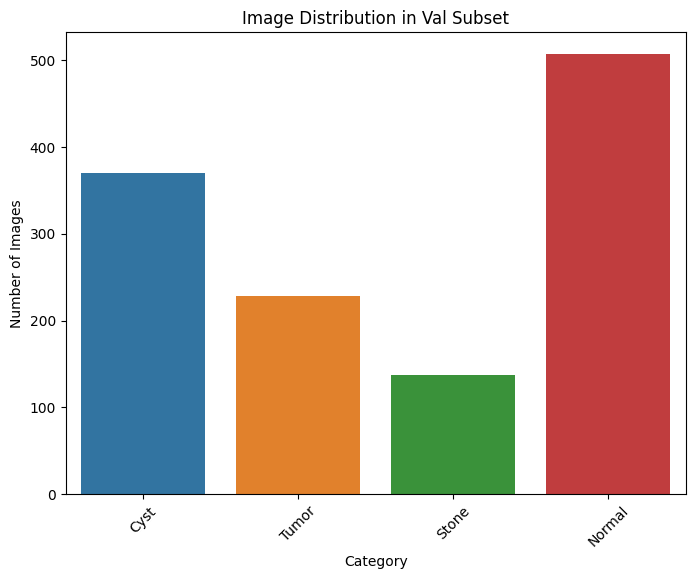

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


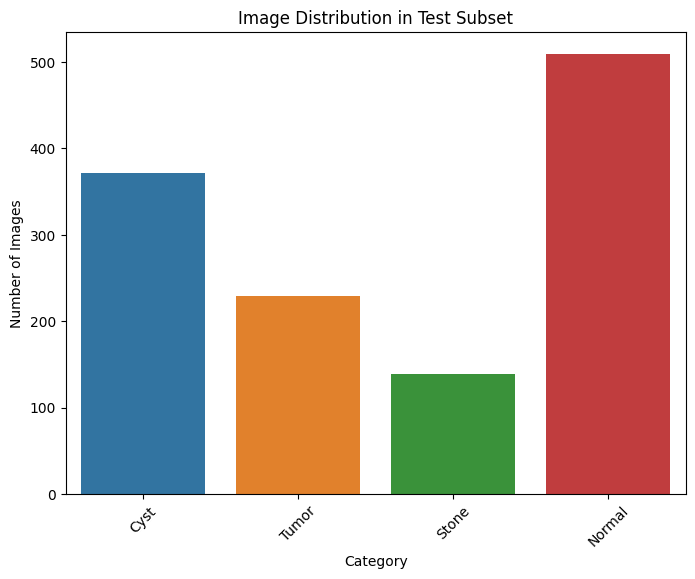

Sample Images from Train Subset:


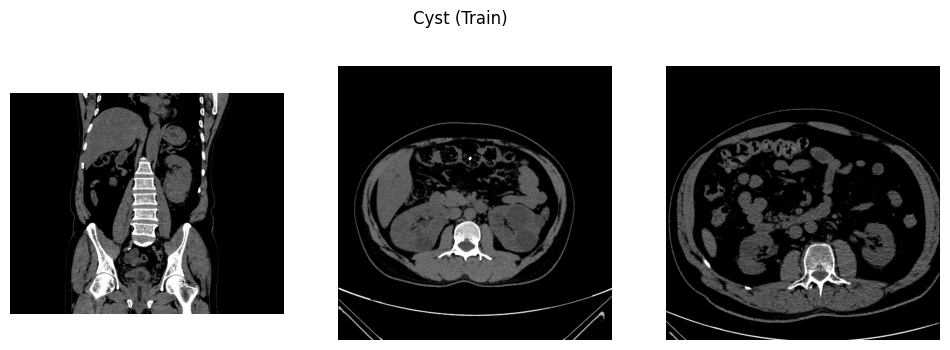

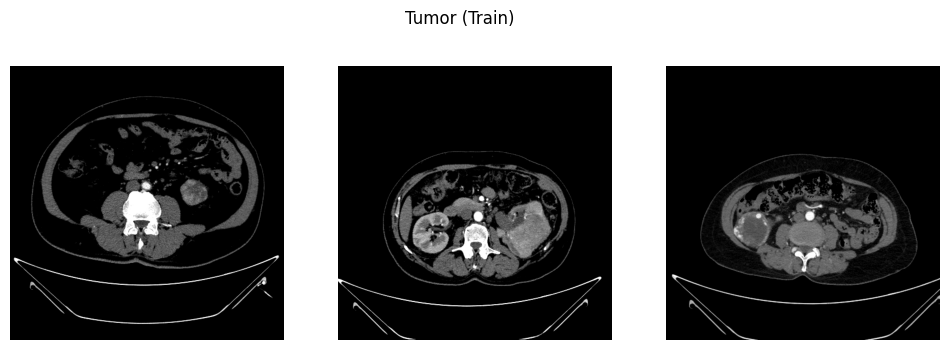

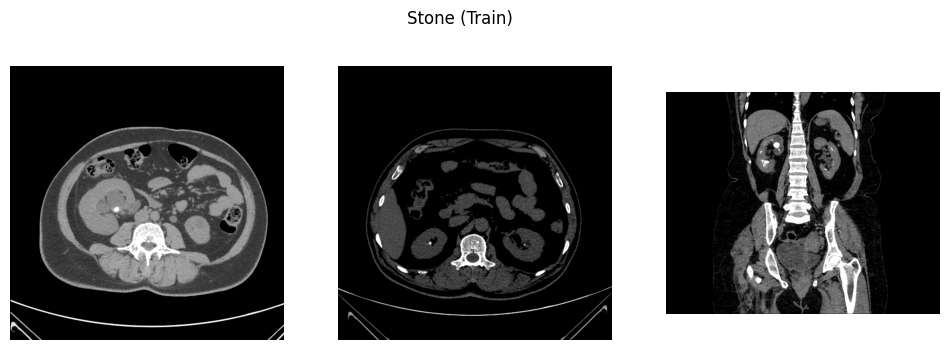

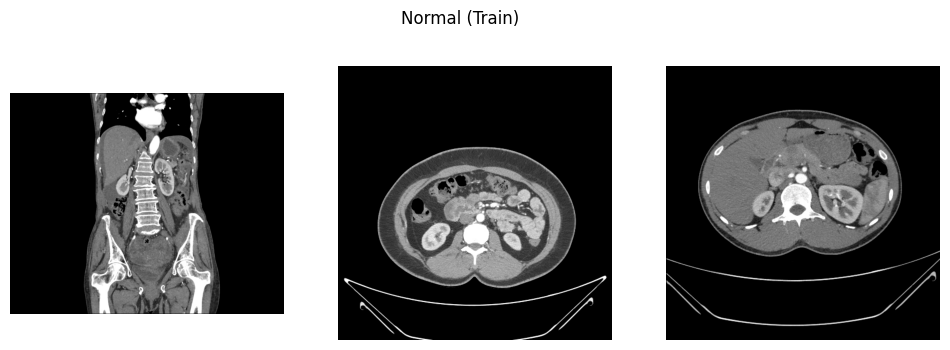

Sample Images from Val Subset:


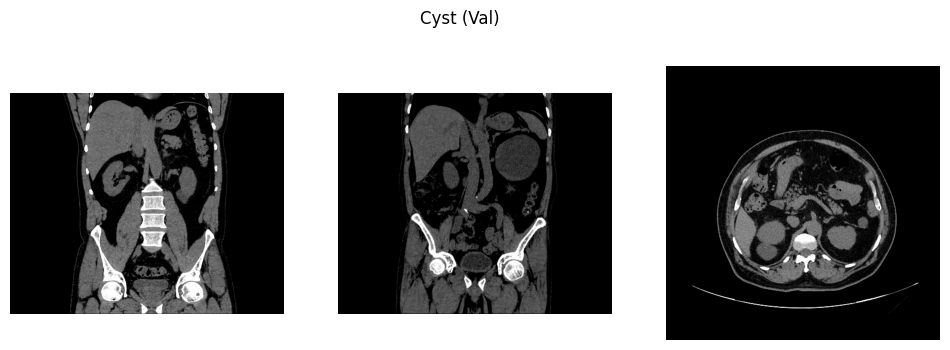

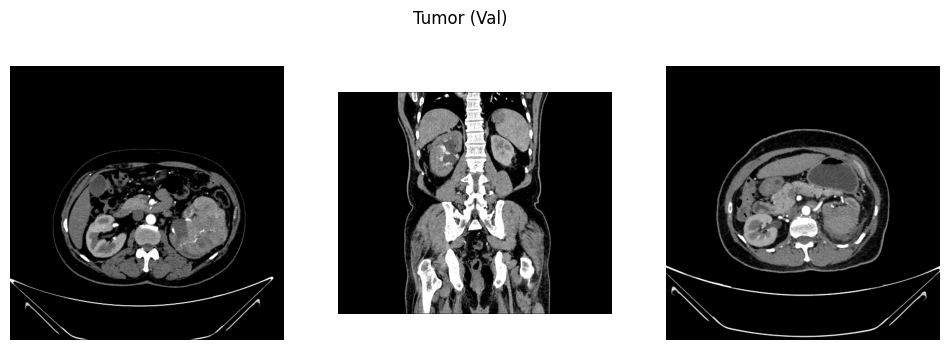

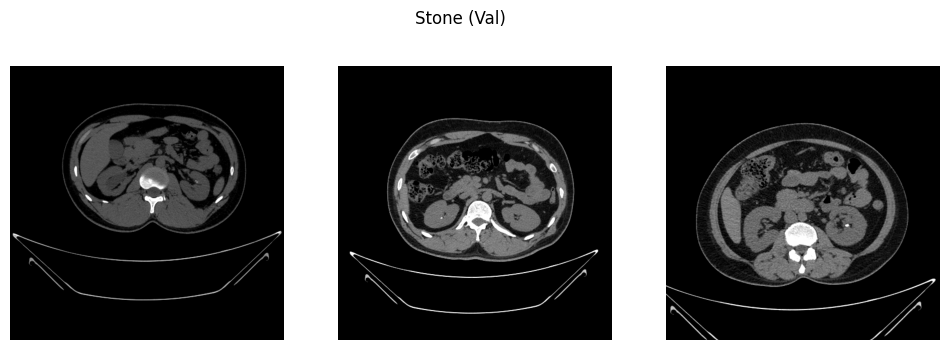

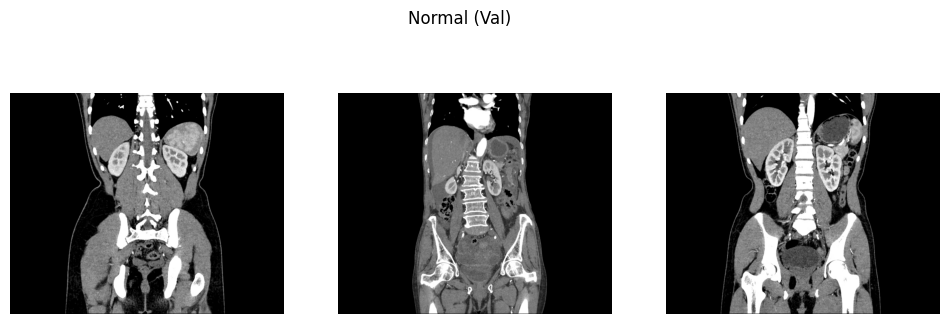

Sample Images from Test Subset:


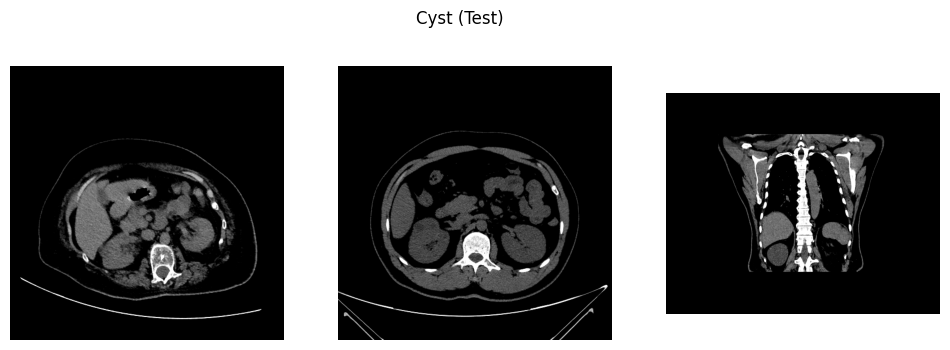

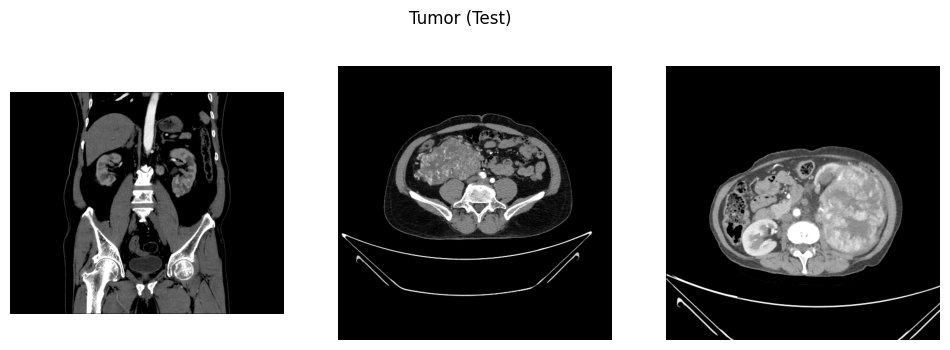

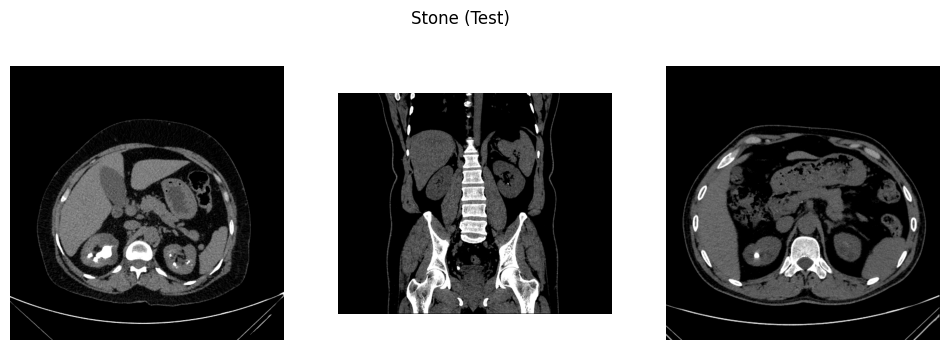

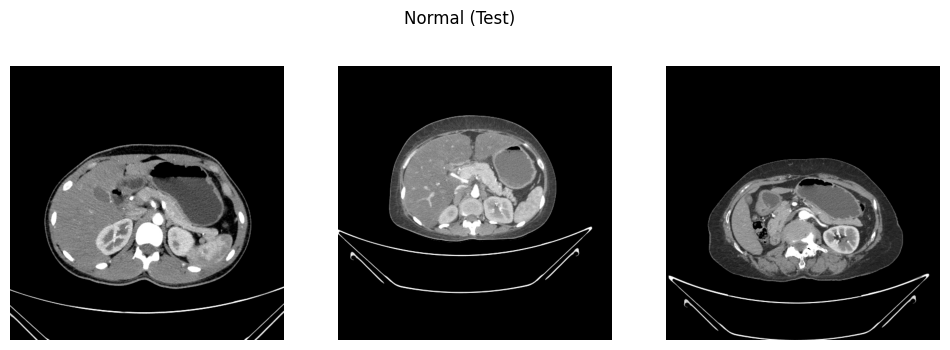

In [2]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Dataset path
data_dir = '/kaggle/input/kindey-stone-dataset-splitted/Kindey_Stone_Dataset'

# Count the number of images in each category
def count_images_in_folders(base_path):
    counts = {}
    for subset in ['train', 'val', 'test']:
        subset_path = os.path.join(base_path, subset)
        subset_counts = {}
        for category in os.listdir(subset_path):
            category_path = os.path.join(subset_path, category)
            if os.path.isdir(category_path):
                subset_counts[category] = len(os.listdir(category_path))
        counts[subset] = subset_counts
    return counts

image_counts = count_images_in_folders(data_dir)
print("Image Counts:")
print(image_counts)

# Visualize the distribution of images in each subset
def plot_distribution(image_counts):
    for subset, counts in image_counts.items():
        plt.figure(figsize=(8, 6))
        sns.barplot(x=list(counts.keys()), y=list(counts.values()))
        plt.title(f"Image Distribution in {subset.capitalize()} Subset")
        plt.xlabel("Category")
        plt.ylabel("Number of Images")
        plt.xticks(rotation=45)
        plt.show()

plot_distribution(image_counts)

# Display sample images from each category
def display_sample_images(base_path, num_samples=3):
    for subset in ['train', 'val', 'test']:
        subset_path = os.path.join(base_path, subset)
        print(f"Sample Images from {subset.capitalize()} Subset:")
        for category in os.listdir(subset_path):
            category_path = os.path.join(subset_path, category)
            if os.path.isdir(category_path):
                images = os.listdir(category_path)[:num_samples]
                fig, axes = plt.subplots(1, num_samples, figsize=(12, 4))
                fig.suptitle(f"{category.capitalize()} ({subset.capitalize()})")
                for i, image_name in enumerate(images):
                    img_path = os.path.join(category_path, image_name)
                    img = Image.open(img_path)
                    axes[i].imshow(img)
                    axes[i].axis('off')
                plt.show()

display_sample_images(data_dir)


# MODEL TRAINING

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 76.9MB/s]
Training Epoch 1/20: 100%|██████████| 312/312 [01:14<00:00,  4.16it/s]


Epoch 1/20, Train Loss: 0.0816, Train Acc: 0.9751, Val Loss: 0.0010, Val Acc: 1.0000


Training Epoch 2/20: 100%|██████████| 312/312 [00:42<00:00,  7.30it/s]


Epoch 2/20, Train Loss: 0.0192, Train Acc: 0.9951, Val Loss: 0.0059, Val Acc: 0.9984


Training Epoch 3/20: 100%|██████████| 312/312 [00:43<00:00,  7.24it/s]


Epoch 3/20, Train Loss: 0.0052, Train Acc: 0.9987, Val Loss: 0.0003, Val Acc: 1.0000


Training Epoch 4/20: 100%|██████████| 312/312 [00:42<00:00,  7.33it/s]


Epoch 4/20, Train Loss: 0.0007, Train Acc: 1.0000, Val Loss: 0.0001, Val Acc: 1.0000


Training Epoch 5/20: 100%|██████████| 312/312 [00:42<00:00,  7.43it/s]


Epoch 5/20, Train Loss: 0.0003, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


Training Epoch 6/20: 100%|██████████| 312/312 [00:41<00:00,  7.45it/s]


Epoch 6/20, Train Loss: 0.0010, Train Acc: 0.9998, Val Loss: 0.0008, Val Acc: 1.0000


Training Epoch 7/20: 100%|██████████| 312/312 [00:41<00:00,  7.56it/s]


Epoch 7/20, Train Loss: 0.0272, Train Acc: 0.9910, Val Loss: 0.0008, Val Acc: 1.0000
Early stopping triggered.


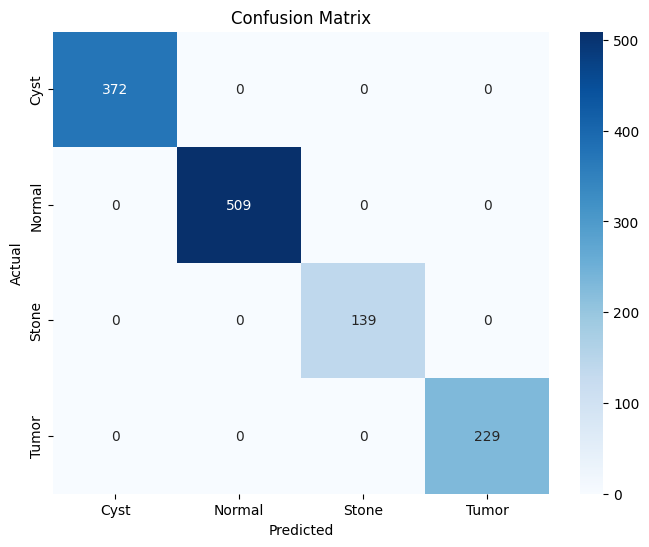

Classification Report:
              precision    recall  f1-score   support

        Cyst       1.00      1.00      1.00       372
      Normal       1.00      1.00      1.00       509
       Stone       1.00      1.00      1.00       139
       Tumor       1.00      1.00      1.00       229

    accuracy                           1.00      1249
   macro avg       1.00      1.00      1.00      1249
weighted avg       1.00      1.00      1.00      1249



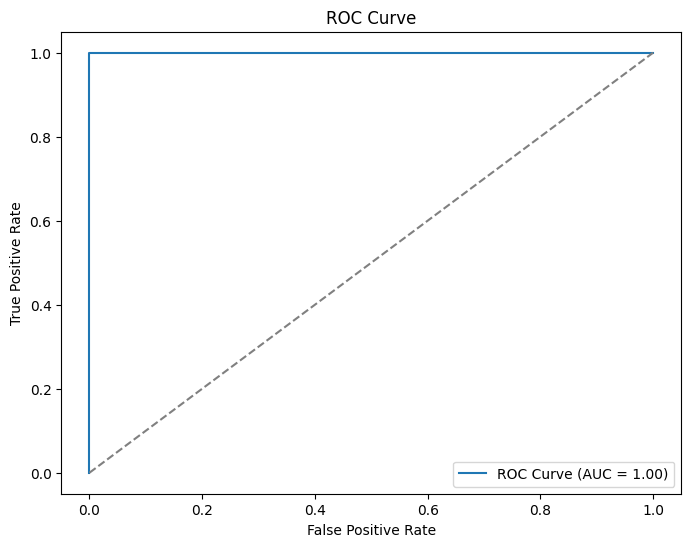

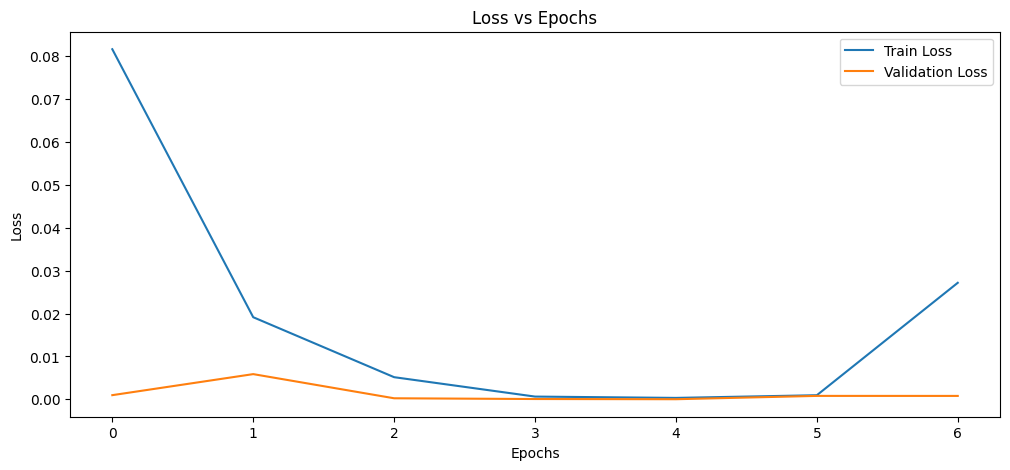

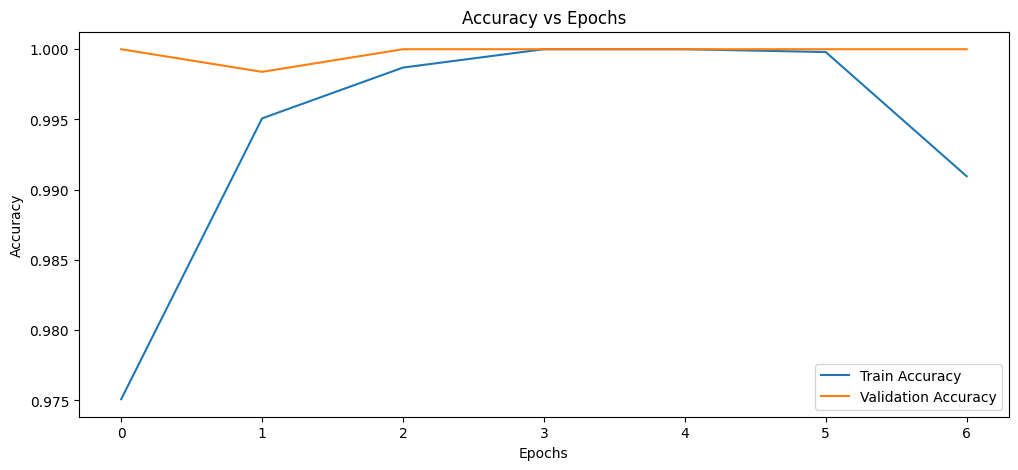

In [3]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset path
data_dir = '/kaggle/input/kindey-stone-dataset-splitted/Kindey_Stone_Dataset'

# Data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Data loaders
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=transform)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Load ResNet-18 model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(train_dataset.classes))  # Adjust the output layer
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Early stopping
class EarlyStopping:
    def __init__(self, patience=2):
        self.patience = patience
        self.best_loss = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

# Train and validate the model
def train_and_validate(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
    early_stopping = EarlyStopping(patience=2)

    for epoch in range(num_epochs):
        model.train()
        train_loss, correct, total = 0, 0, 0

        for images, labels in tqdm(train_loader, desc=f'Training Epoch {epoch+1}/{num_epochs}'):
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_loss /= total
        train_acc = correct / total

        # Validate
        model.eval()
        val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        val_loss /= total
        val_acc = correct / total

        # Store history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

        # Early stopping
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break

    return history

# Training
num_epochs = 20
history = train_and_validate(model, train_loader, val_loader, criterion, optimizer, num_epochs)

# Save the model
torch.save(model.state_dict(), 'kidney_stone_resnet18.pth')

# Evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    true_labels = []
    pred_labels = []
    probabilities = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(probs, 1)

            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(predicted.cpu().numpy())
            probabilities.extend(probs[:, 1].cpu().numpy())

    return np.array(true_labels), np.array(pred_labels), np.array(probabilities)

true_labels, pred_labels, probabilities = evaluate_model(model, test_loader)

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=train_dataset.classes))

# ROC curve
fpr, tpr, _ = roc_curve(true_labels, probabilities, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Training history plots
plt.figure(figsize=(12, 5))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
